In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
test_results = pd.read_csv('test_results.csv')
test_results

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0
...,...,...,...,...,...,...,...,...
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39,0
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0


In [28]:
users = pd.read_csv('user_table.csv')
users

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68
...,...,...,...,...,...
275611,485975,Atlanta,USA,33.76,-84.42
275612,35479,Los Angeles,USA,34.11,-118.41
275613,516519,Chicago,USA,41.84,-87.68
275614,984877,Tampa,USA,27.96,-82.48


In [29]:
# add user information from users table to the test_results table
test_merged = pd.merge(test_results, users, how='left', on='user_id')
test_merged

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02
...,...,...,...,...,...,...,...,...,...,...,...,...
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0,Bell Gardens,USA,33.97,-118.15
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0,West Seneca,USA,42.84,-78.75
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0,Walnut Creek,USA,37.90,-122.04


In [30]:
test_ab_OS = test_merged.drop(columns=['city', 'country', 'device', 'source', 'user_id', 'timestamp', 'lat', 'long'])
test_ab_OS

,operative_system,test,price,converted
0,iOS,0,39,0
1,android,0,39,0
2,android,0,39,0
3,iOS,1,59,0
4,mac,0,39,0
...,...,...,...,...
316795,windows,0,39,0
316796,windows,0,39,0
316797,mac,0,39,0
316798,android,0,39,0


In [31]:
def permutation_test(data, group_col, value_col, num_permutations=1000):
    # Calculate the observed difference in means
    group_means = data.groupby(group_col)[value_col].mean()
    observed_diff = group_means.iloc[1] - group_means.iloc[0]

    # Combine all values and shuffle
    combined_values = data[value_col].values
    permutation_diffs = []

    for _ in range(num_permutations):
        np.random.shuffle(combined_values)  # Shuffle the values in place
        data[group_col] = np.random.permutation(data[group_col])  # Shuffle group labels
        perm_means = data.groupby(group_col)[value_col].mean()
        perm_diff = perm_means[1] - perm_means[0]
        permutation_diffs.append(perm_diff)

    p_value = sum(abs(diff) >= abs(observed_diff) for diff in permutation_diffs) / num_permutations

    plt.hist(permutation_diffs, bins=30, alpha=0.7, edgecolor='black')
    plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Difference: {observed_diff:.4f}')
    plt.title('Permutation Test Differences')
    plt.xlabel('Difference in Means')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    return p_value, observed_diff, permutation_diffs

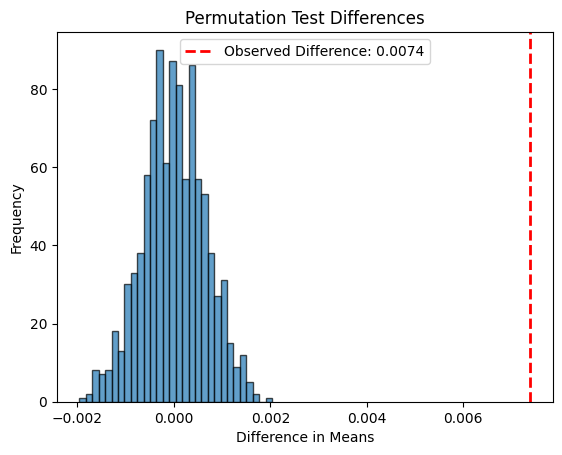

(0.0, 0.0073893751965927144, [-0.0010134693420343135, -0.00030446750667911804, -1.0305200312379914e-05, -0.00015422923264584235, 0.0002517141630290036, 0.0008987268356261263, 0.00020507865838691186, -0.00031953459858999333, -0.00030245874747552096, 0.0009628680406903456, -0.0004217017411877952, -5.140019200846474e-06, 0.0008528091443807222, -0.0007553242139975644, -0.0009896493999123693, 0.000588063208439054, -0.0005281743662818167, 0.0003492906548094067, -0.00011433781901121903, 0.00013950182652931048, 0.00033895889470240276, 0.0009803751389964067, 0.00039922586446199115, 1.0309393964173796e-06, 0.00015557329804198258, 0.0006197749042728198, 0.0010587223394722609, -0.0005484066393042289, 0.0007202212517560605, 1.4519121411357694e-05, 0.0004762821191309462, 5.053629974134319e-05, 0.00031513895258046196, -0.0009157495671513576, 8.124361597331223e-05, 5.627601114702174e-05, 0.000533679233187697, 0.0009645902336888335, 0.0009721954211955493, 0.0008714625075072029, -0.0011889617870989855, 

In [32]:
print(permutation_test(test_ab_OS, 'operative_system', 'converted'))